In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
tabular_data = pd.read_csv("tabular_data.csv")
hashed_feature = pd.read_csv("hashed_feature.csv")
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [43]:
pd.options.display.max_columns = None

In [414]:
tabular_data#[tabular_data.feature_0 != 110]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,NaN,147.0,0.000000,176.78,55.000000,0.248711,0.001373,0.0,0.0,0.000000,0.476549,333.60,0.277617,55.00,0.00,55.00,21.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,1.00,55.000000,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.0,0.000000,0.00,0.00,0,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28,0.000000
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,NaN,135.0,0.000000,315.42,110.000000,0.261744,-0.002248,0.0,0.0,0.000000,0.210951,428.78,0.290904,110.00,0.00,110.00,26.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.77,110.000000,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.0,0.000000,15.75,0.00,0,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97,0.000000
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,NaN,181.0,0.000000,354.48,55.000000,0.302164,0.002083,0.0,0.0,0.000000,0.058675,526.38,0.284842,55.00,0.00,55.00,36.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.05,85249.281058,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.0,0.000000,0.00,0.07,0,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78,0.000000
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,NaN,142.0,0.000000,229.98,55.000000,0.347660,0.005207,0.0,0.0,0.000000,0.966854,398.98,0.285235,55.00,0.00,55.00,30.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.00,55.000000,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.0,0.000000,0.00,0.00,0,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83,0.000000
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,NaN,92.0,0.000000,306.17,55.000000,0.438425,0.025736,0.0,21.0,0.000000,0.700180,215.17,0.161147,55.00,0.00,55.00,20.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.0,0.000000,26.75,0.95,0,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83,0.000000
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,NaN,110.0,0.000000,276.78,55.000000,0.429781,0.030347,0.0,18.0,0.000000,0.544730,279.12,0.142850,55.00,0.00,55.00,42.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.77,55.000000,106.0,5409.0,113.0,0.313367,177.0,51.409212,89.58,0.0,0.000000,38.37,0.24,0,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20,0.000000
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,NaN,190.0,0.000000,688.82,55.000000,0.433959,0.018277,0.0,2.0,0.000000,0.173358,399.53,0.160262,55.00,0.00,55.00,38.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,193.0,5379.0,205.0,0.279737,176.0,482.808738,194.85,0.0,0.000000,0.00,1.56,0,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97,0.000000
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,NaN,178.0,0.000000,618.18,55.000000,0.431441,0.019732,0.0,9.0,0.000000,0.150241,466.77,0.160802,55.00,0.00,55.00,46.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,176.0,5348.0,189.0,0.290168,175.0,481.871825,143.23,0.0,0.000000,0.00,1.17,0,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95,0.000000
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,NaN,125.0,0.000000,538.78,55.750000,0.438065,0.011378,0.0,2.0,0.000000,0.677110,268.70,0.197743,55.75,0.00,55.75,56.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.72,80615.165370,194.0,5318.0,199.0,0.173101,174.0,185.152871,143.82,0.0,0.000000,0.00,0.37,0,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97,0.000000
9,0,10,110.0,60.00,0.129596,1099.289203,608.28,0.0,0.438465,NaN,152.0,0

In [44]:
tabular_data.describe()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,61272.000000,61272.000000,58460.000000,58380.000000,57795.000000,58314.000000,58425.000000,58257.000000,57814.000000,58280.000000,58338.000000,58344.000000,58318.000000,58184.000000,57847.000000,57938.000000,58366.000000,58410.000000,58193.000000,61272.000000,58212.000000,57708.000000,58331.000000,58463.000000,58399.000000,58173.000000,58321.000000,58604.000000,58373.000000,58274.000000,58810.000000,58457.000000,58354.000000,58270.000000,57494.000000,58387.000000,58255.000000,58445.000000,58409.000000,61272.000000,58415.000000,58402.000000,61272.0,58389.000000,58218.000000,58428.000000,58307.000000,53036.000000,58418.000000,58368.000000,58397.000000
mean,2552.500000,6.500000,110.070493,87.142409,0.305150,3003.454276,414.703826,1466.527398,0.576053,391.127914,125.101255,114.737443,388.728984,1009.457709,0.287931,0.050513,3.155639,10.821589,363.889708,0.499903,417.464495,0.227281,70.269164,11.901861,958.070795,27.880013,3.099158,100.387823,4.873682,20.632075,1851.145168,131.571121,2958.747901,133.563480,0.231423,86.755117,1478.685268,100.235933,4.941925,0.024942,2.864665,2.389240,0.0,451.453999,1.092617,70.045547,12.617404,0.420170,125.407494,288.885904,62.298690
std,1473.987237,3.452081,0.465371,95.507541,0.746314,11218.392268,524.216185,7356.174585,0.738444,436.314898,145.203774,661.855299,512.211932,6182.586735,0.111642,0.087219,24.529224,14.111705,2406.061731,0.289287,445.821333,0.111598,60.744476,54.744476,5974.881448,37.923651,24.016987,119.450853,12.779626,45.393407,11954.561123,149.997946,1723.916883,174.027542,0.161397,70.676962,8254.261078,147.057407,25.539829,0.126317,28.304415,12.291543,0.0,2784.078472,2.989411,60.523556,22.794809,0.402705,123.970687,380.992122,341.761943
min,0.000000,1.000000,110.000000,-4.250000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,-1755.000000,0.000000,0.000000,-1857.710000,0.000000,-1.000000,0.000000,-31.000000,0.000000,0.000001,0.000000,0.000000,0.000000,-4.250000,-4.250000,-300.000000,0.000000,0.000000,0.000000,-464.620000,0.000000,0.000000,0.000000,-2362.000000,0.000000,-227.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-234.610000,0.0,-71832.185113,0.000000,0.000000,0.000000,-0.999903,0.000000,0.000000,0.000000
25%,1276.000000,3.750000,110.000000,45.000000,0.059522,0.000000,70.320000,0.000000,0.247418,99.295000,39.000000,0.000000,54.740000,35.000000,0.207877,0.005089,0.000000,0.000000,0.000000,0.247295,117.420000,0.134781,35.000000,0.000000,45.000000,4.000000,0.000000,23.000000,0.000000,0.220000,0.000000,31.000000,1587.000000,29.000000,0.082152,43.000000,0.000000,9.050000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,35.000000,1.000000,0.084032,39.000000,38.845000,0.000000
50%,2552.500000,6.500000,110.000000,75.000000,0.147504,10.898701,254.950000,0.000000,0.492813,262.430000,100.000000,3.450000,226.960000,70.500000,0.292973,0.021653,0.000000,2.000000,0.000000,0.498526,290.350000,0.223581,62.000000,0.940000,75.000000,19.000000,0.000000,69.000000,0.000000,5.600000,66.000000,92.000000,2489.000000,99.000000,0.213396,79.000000,0.000000,50.480000,0.000000,0.000000,0.000000,0.150000,0.0,0.000000,0.000000,61.580000,5.000000,0.412981,94.000000,168.250000,3.000000
75%,3829.000000,9.250000,110.000000,114.000000,0.321111,1809.999746,566.530000,0.000000,0.698059,535.162500,184.000000,23.300000,529.122500,110.850000,0.364436,0.066905,1.000000,27.000000,1.000000,0.752020,570.907500,0.317355,95.000000,8.400000,116.005000,42.000000,1.0000

Виявити викиди для кожної колонки і замінити на NaN

In [208]:
def my_zscore(x):
    new_x = x.dropna()
    bad_list = new_x[np.abs(stats.zscore(new_x)) > 3].to_list()
    return x.isin(bad_list)

abs_z_scores = tabular_data.drop(["id", "period", "feature_25"], axis=1).apply(lambda x: my_zscore(x))

outliers = tabular_data.drop(["id", "period", "feature_25"], axis=1)
outliers[abs_z_scores] = np.nan
tabular_data_drop_outliers = tabular_data.copy()
tabular_data_drop_outliers.loc[:, tabular_data_drop_outliers.columns.difference(["id", "period", "feature_25"])] = outliers

C:\Users\dzhov\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


Замінити пропуски у даних значеннями, що найбільше зустрічається у кожній колонці по кожному id. Якщо для колонки і певного значення id - замінити середнім по колонці

In [257]:
tabular_data_fillna = tabular_data_drop_outliers.copy()
for i in tabular_data_drop_outliers.drop(["id", "period", "feature_25"], axis=1).columns:
    m = tabular_data_drop_outliers[i].mean()
    feature_nan = np.repeat(tabular_data_drop_outliers.groupby(["id"]).apply(lambda x: m if all(x[i].isnull()) else x[i].mode()[0]).to_list(), 12)
    tabular_data_fillna[i] = tabular_data_fillna[i].fillna(pd.Series(feature_nan))

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,356.577882,147.0,0.00,176.78,55.00,0.248711,0.001373,0.000000,0.0,0.0,0.476549,333.60,0.277617,55.00,0.00,55.00,21.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,92.076916,0.00,1.00,55.00,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.000000,0.000000,0.00,0.00,0,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28000,0.0
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,356.577882,135.0,0.00,315.42,110.00,0.261744,-0.002248,0.000000,0.0,0.0,0.210951,428.78,0.290904,110.00,0.00,110.00,26.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,92.076916,0.00,0.77,110.00,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.000000,0.000000,15.75,0.00,0,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97000,0.0
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,356.577882,181.0,0.00,354.48,55.00,0.302164,0.002083,0.000000,0.0,0.0,0.058675,526.38,0.284842,55.00,0.00,55.00,36.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,92.076916,0.00,0.05,55.00,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.000000,0.000000,0.00,0.07,0,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78000,0.0
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,356.577882,142.0,0.00,229.98,55.00,0.347660,0.005207,0.000000,0.0,0.0,0.966854,398.98,0.285235,55.00,0.00,55.00,30.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,92.076916,0.00,0.00,55.00,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.000000,0.000000,0.00,0.00,0,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83000,0.0
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,356.577882,92.0,0.00,306.17,55.00,0.438425,0.025736,0.000000,21.0,0.0,0.700180,215.17,0.161147,55.00,0.00,55.00,20.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,92.076916,0.00,0.00,55.00,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.000000,0.000000,26.75,0.95,0,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83000,0.0
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,356.577882,110.0,0.00,276.78,55.00,0.429781,0.030347,0.000000,18.0,0.0,0.544730,279.12,0.142850,55.00,0.00,55.00,42.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,92.076916,0.00,0.77,55.00,106.0,5409.0,113.0,0.313367,177.0,51.409212,89.58,0.000000,0.000000,38.37,0.24,0,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20000,0.0
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,356.577882,190.0,0.00,688.82,55.00,0.433959,0.018277,0.000000,2.0,0.0,0.173358,399.53,0.160262,55.00,0.00,55.00,38.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,92.076916,0.00,0.00,55.00,193.0,5379.0,205.0,0.279737,176.0,482.808738,194.85,0.000000,0.000000,0.00,1.56,0,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97000,0.0
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,356.577882,178.0,0.00,618.18,55.00,0.431441,0.019732,0.000000,9.0,0.0,0.150241,466.77,0.160802,55.00,0.00,55.00,46.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,92.076916,0.00,0.00,55.00,176.0,5348.0,189.0,0.290168,175.0,481.871825,143.23,0.000000,0.000000,0.00,1.17,0,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95000,0.0
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,356.577882,125.0,0.00,538.78,55.75,0.438065,0.011378,0.000000,2.0,0.0,0.677110,268.70,0.197743,55.75,0.00,55.75,56.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,92.076916,0.00,0.72,55.00,194.0,5318.0,199.0,0.173101,174.0,185.152871,143.82,0.000000,0.000000,0.00,0.37,0,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97000,0.0
9,0,10,110.0,60.00,0.129596,1099.289203,6

In [263]:
for col in tabular_data_fillna:
    print(col, len(tabular_data_fillna[col].unique()), sum(tabular_data_fillna[col].isna()))

id 5106 0
period 12 0
feature_0 3 0
feature_1 9757 0
feature_2 53882 0
feature_3 31750 0
feature_4 33518 0
feature_5 10539 0
feature_6 55250 0
feature_7 33977 0
feature_8 869 0
feature_9 7377 0
feature_10 32542 0
feature_11 10634 0
feature_12 54853 0
feature_13 45629 0
feature_14 78 0
feature_15 64 0
feature_16 308 0
feature_17 61272 0
feature_18 34836 0
feature_19 54833 0
feature_20 6136 0
feature_21 4110 0
feature_22 10104 0
feature_23 228 0
feature_24 77 0
feature_25 8 0
feature_26 460 0
feature_27 2351 0
feature_28 7884 0
feature_29 4622 0
feature_30 583 0
feature_31 6599 0
feature_32 1034 0
feature_33 55134 0
feature_34 361 0
feature_35 28126 0
feature_36 16673 0
feature_37 234 0
feature_38 1238 0
feature_39 2032 0
feature_40 3132 0
feature_41 1 0
feature_42 29004 0
feature_43 12 0
feature_44 6130 0
feature_45 83 0
feature_46 52265 0
feature_47 499 0
feature_48 28991 0
feature_49 271 0


feature_41 усюди має одне значення - не корисне для моделі

In [264]:
tabular_data_drop41 = tabular_data_fillna.drop(["feature_41"], axis=1)

In [266]:
tabular_data_drop41.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61272 entries, 0 to 61271
Data columns (total 51 columns):
id            61272 non-null int64
period        61272 non-null int64
feature_0     61272 non-null float64
feature_1     61272 non-null float64
feature_2     61272 non-null float64
feature_3     61272 non-null float64
feature_4     61272 non-null float64
feature_5     61272 non-null float64
feature_6     61272 non-null float64
feature_7     61272 non-null float64
feature_8     61272 non-null float64
feature_9     61272 non-null float64
feature_10    61272 non-null float64
feature_11    61272 non-null float64
feature_12    61272 non-null float64
feature_13    61272 non-null float64
feature_14    61272 non-null float64
feature_15    61272 non-null float64
feature_16    61272 non-null float64
feature_17    61272 non-null float64
feature_18    61272 non-null float64
feature_19    61272 non-null float64
feature_20    61272 non-null float64
feature_21    61272 non-null float64
feature

One Hot Encoding для feature_25

In [268]:
tabular_data_drop41.feature_25.unique()

array(['f9ae10397ed62e79c644d06842bbcd92963a5927',
       '11e623a37e87cf7995c466723ec99688d55cae8c',
       'aa2c96dacf00c451ef465f6115a45a20bccf1256',
       'b204e1e3743cc314841070435211e25f4602b9fd',
       '390c481a740bb1c12c57f33dc5263ced2ab11796',
       'cf3cca1da7361bd988642600e76c4a3021be8ccf',
       'd458ece2abeae803254c5d442b2e2a80f58a4153',
       'cf7413906c99be47067cb3fb6299959857710d77'], dtype=object)

In [278]:
one_hot_25 = pd.get_dummies(tabular_data_drop41.feature_25, prefix='', drop_first=True)
one_hot_25.rename(columns={c: "feature_25_" + str(i+1) for i, c in enumerate(one_hot_25.columns)}, inplace=True)
tabular_data_oh25 = pd.concat([tabular_data_drop41, one_hot_25], axis=1).drop(["feature_25"], axis=1)
tabular_data_oh25

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,356.577882,147.0,0.00,176.78,55.00,0.248711,0.001373,0.000000,0.0,0.0,0.476549,333.60,0.277617,55.00,0.00,55.00,21.0,0.0,92.076916,0.00,1.00,55.00,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.000000,0.000000,0.00,0.00,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28000,0.0,0,0,0,0,0,0,1
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,356.577882,135.0,0.00,315.42,110.00,0.261744,-0.002248,0.000000,0.0,0.0,0.210951,428.78,0.290904,110.00,0.00,110.00,26.0,0.0,92.076916,0.00,0.77,110.00,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.000000,0.000000,15.75,0.00,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97000,0.0,0,0,0,0,0,0,1
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,356.577882,181.0,0.00,354.48,55.00,0.302164,0.002083,0.000000,0.0,0.0,0.058675,526.38,0.284842,55.00,0.00,55.00,36.0,0.0,92.076916,0.00,0.05,55.00,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.000000,0.000000,0.00,0.07,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78000,0.0,0,0,0,0,0,0,1
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,356.577882,142.0,0.00,229.98,55.00,0.347660,0.005207,0.000000,0.0,0.0,0.966854,398.98,0.285235,55.00,0.00,55.00,30.0,0.0,92.076916,0.00,0.00,55.00,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.000000,0.000000,0.00,0.00,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83000,0.0,0,0,0,0,0,0,1
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,356.577882,92.0,0.00,306.17,55.00,0.438425,0.025736,0.000000,21.0,0.0,0.700180,215.17,0.161147,55.00,0.00,55.00,20.0,0.0,92.076916,0.00,0.00,55.00,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.000000,0.000000,26.75,0.95,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83000,0.0,0,0,0,0,0,0,0
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,356.577882,110.0,0.00,276.78,55.00,0.429781,0.030347,0.000000,18.0,0.0,0.544730,279.12,0.142850,55.00,0.00,55.00,42.0,0.0,92.076916,0.00,0.77,55.00,106.0,5409.0,113.0,0.313367,177.0,51.409212,89.58,0.000000,0.000000,38.37,0.24,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20000,0.0,0,0,0,0,0,0,0
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,356.577882,190.0,0.00,688.82,55.00,0.433959,0.018277,0.000000,2.0,0.0,0.173358,399.53,0.160262,55.00,0.00,55.00,38.0,0.0,92.076916,0.00,0.00,55.00,193.0,5379.0,205.0,0.279737,176.0,482.808738,194.85,0.000000,0.000000,0.00,1.56,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97000,0.0,0,0,0,0,0,0,0
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,356.577882,178.0,0.00,618.18,55.00,0.431441,0.019732,0.000000,9.0,0.0,0.150241,466.77,0.160802,55.00,0.00,55.00,46.0,0.0,92.076916,0.00,0.00,55.00,176.0,5348.0,189.0,0.290168,175.0,481.871825,143.23,0.000000,0.000000,0.00,1.17,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95000,0.0,0,0,0,0,0,0,0
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,356.577882,125.0,0.00,538.78,55.75,0.438065,0.011378,0.000000,2.0,0.0,0.677110,268.70,0.197743,55.75,0.00,55.75,56.0,0.0,92.076916,0.00,0.72,55.00,194.0,5318.0,199.0,0.173101,174.0,185.152871,143.82,0.000000,0.000000,0.00,0.37,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97000,0.0,0,0,0,0,0,0,0
9,0,10,110.0,60.00,0.129596,1099.289203,608.28,0.0,0.438465,356.577882,152.0,0.00,607.95,60.00,0.433901,0.016291,0.000000,11.0,0.0,0.751816,315.77,0.161442,55.75,4.25,60.00,32.0,0.0,92.076916,0.00,4.57,60.00,166.0,5287.0,169.0,0.2587

Для колонок, які, скоріш за все, повині бути дійсними числами, замінити числа з плаваючою комою на дійсні

In [319]:
tabular_data_int = tabular_data_oh25.copy()
tabular_data_int["feature_0"] = tabular_data_int["feature_0"].apply(lambda x: 0 if x < 111.0 else 1)
tabular_data_int[["feature_" + str(i) for i in [8, 14, 15, 23, 24, 26, 30, 31, 32, 34, 43, 45, 47, 49]]] = tabular_data_int[["feature_" + str(i) for i in [8, 14, 15, 23, 24, 26, 30, 31, 32, 34, 43, 45, 47, 49]]].apply(round)

In [329]:
#tabular_data_int.columns[tabular_data_int.apply(lambda x: True if x.min()<0 and x.max()>0 else False)]
tabular_data_int.iloc[:, 3:50].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,55.0,0.432017,0.000000,176.78,0.0,0.323712,356.577882,147.0,0.0,176.78,55.0,0.248711,0.001373,0.0,0.0,0.0,0.476549,333.60,0.277617,55.0,0.0,55.0,21.0,0.0,92.0,0.0,1.00,55.0,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.0,0.0,0.00,0.00,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,110.0,0.397517,0.000000,315.42,0.0,0.316798,356.577882,135.0,0.0,315.42,110.0,0.261744,-0.002248,0.0,0.0,0.0,0.210951,428.78,0.290904,110.0,0.0,110.0,26.0,0.0,92.0,0.0,0.77,110.0,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.0,0.0,15.75,0.00,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,55.0,0.359440,0.000000,354.55,0.0,0.339188,356.577882,181.0,0.0,354.48,55.0,0.302164,0.002083,0.0,0.0,0.0,0.058675,526.38,0.284842,55.0,0.0,55.0,36.0,0.0,92.0,0.0,0.05,55.0,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.0,0.0,0.00,0.07,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,55.0,0.285707,0.000000,229.98,0.0,0.415428,356.577882,142.0,0.0,229.98,55.0,0.347660,0.005207,0.0,0.0,0.0,0.966854,398.98,0.285235,55.0,0.0,55.0,30.0,0.0,92.0,0.0,0.00,55.0,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.0,0.0,0.00,0.00,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,55.0,0.101487,444.730391,307.12,0.0,0.569670,356.577882,92.0,0.0,306.17,55.0,0.438425,0.025736,0.0,21.0,0.0,0.700180,215.17,0.161147,55.0,0.0,55.0,20.0,0.0,92.0,0.0,0.00,55.0,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.0,0.0,26.75,0.95,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


Відняти середнє і поділити на відхилення

In [330]:
scaler = StandardScaler()
tabular_data_scaled = tabular_data_int.copy()
scaler.fit(tabular_data_scaled.iloc[:, 3:50])
tabular_data_scaled.iloc[:, 3:50] = scaler.transform(tabular_data_scaled.iloc[:, 3:50])
tabular_data_scaled.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7
0,0,1,0,-0.410254,1.427522,-0.433103,-0.488964,-0.283428,-0.550697,0.005266,0.229032,-0.455536,-0.439884,-0.193565,-0.327898,-0.663977,-0.280846,-0.764539,-0.130888,-0.080731,-0.132141,0.482856,-0.229899,-0.440218,-0.321724,-0.163193,-0.273842,0.00011,-0.473715,-0.535997,-0.178905,-0.239055,1.533714,-0.232273,-1.213987,1.463621,-0.357336,-0.413323,-0.203047,-0.173532,-0.190963,-0.382981,-0.234603,-0.4547,-0.226460,-0.577791,0.291774,0.281345,-0.431824,-0.470356,0,0,0,0,0,0,1
1,0,2,0,0.440016,1.221959,-0.433103,-0.138109,-0.283428,-0.576105,0.005266,0.130158,-0.455536,-0.076332,0.372015,-0.208393,-0.718822,-0.280846,-0.764539,-0.130888,-0.998850,0.137658,0.602107,0.834227,-0.440218,0.265642,-0.000940,-0.273842,0.00011,-0.473715,-0.543913,0.238638,-0.059285,1.516583,-0.082795,-1.167847,1.447693,-0.357336,-0.010631,-0.203047,-0.173532,2.131817,-0.382981,-0.234603,-0.4547,0.840116,-0.645299,0.174952,0.133835,-0.094338,-0.470356,0,0,0,0,0,0,1
2,0,3,0,-0.410254,0.995084,-0.433103,-0.039083,-0.283428,-0.493825,0.005266,0.509174,-0.455536,0.026094,-0.193565,0.162228,-0.653220,-0.280846,-0.764539,-0.130888,-1.525236,0.414317,0.547702,-0.229899,-0.440218,-0.321724,0.323567,-0.273842,0.00011,-0.473715,-0.568695,-0.178905,0.120485,1.498881,0.073801,-1.143325,1.431764,-0.357336,0.346943,-0.203047,-0.173532,-0.190963,-0.367493,-0.234603,-0.4547,-0.226460,-0.645299,0.248233,0.625535,-0.088020,-0.470356,0,0,0,0,0,0,1
3,0,4,0,-0.410254,0.555756,-0.433103,-0.354332,-0.283428,-0.213660,0.005266,0.187834,-0.455536,-0.300379,-0.193565,0.579391,-0.605901,-0.280846,-0.764539,-0.130888,1.614154,0.053187,0.551230,-0.229899,-0.440218,-0.321724,0.128863,-0.273842,0.00011,-0.473715,-0.570416,-0.178905,-0.162011,1.481750,-0.168211,-0.987187,1.415835,-0.357336,-0.387884,-0.203047,-0.173532,-0.190963,-0.382981,-0.234603,-0.4547,-0.226460,-0.712808,0.686080,0.251843,-0.255385,-0.470356,0,0,0,0,0,0,1
4,0,5,0,-0.410254,-0.541893,-0.341561,-0.159114,-0.283428,0.353146,0.005266,-0.224140,-0.455536,-0.100588,-0.193565,1.411635,-0.294953,-0.280846,0.740111,-0.130888,0.692315,-0.467844,-0.562503,-0.229899,-0.440218,-0.321724,-0.195643,-0.273842,0.00011,-0.473715,-0.570416,-0.178905,-0.333221,1.464047,-0.218037,0.257217,1.399907,-0.225115,0.612172,-0.203047,-0.173532,3.754077,-0.172787,-0.213979,-0.4547,-0.226460,-0.712808,0.932843,-0.308696,-0.353116,-0.470356,0,0,0,0,0,0,0


In [331]:
tabular_data_scaled.describe()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7
count,61272.000000,61272.000000,61272.000000,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,6.127200e+04,61272.000000,61272.000000,61272.000000,61272.000000,61272.000000,61272.000000,61272.000000
mean,2552.500000,6.500000,0.015195,-3.027909e-16,-1.468794e-16,-1.150612e-16,6.041340e-16,-3.019322e-15,2.747219e-16,4.282713e-16,-2.106583e-17,7.677086e-17,3.811744e-16,2.309975e-16,-1.158639e-16,1.957313e-16,-1.909521e-15,1.710296e-15,-3.396081e-16,3.733177e-17,-2.975953e-16,3.014229e-16,-3.586590e-16,-3.257694e-15,-2.555767e-17,-1.012258e-15,1.052833e-15,-3.232099e-16,-6.561898e-16,-4.706199e-16,2.611082e-16,1.146589e-16,1.894375e-16,2.885870e-16,4.122205e-16,-3.123611e-15,-6.678425e-16,-2.078932e-16,2.114085e-15,-1.932511e-15,6.928522e-15,-3.115952e-16,9.290154e-16,2.638213e-15,3.819898e-16,-3.807903e-16,1.667491e-16,-4.915118e-17,4.357488e-16,-9.886968e-16,0.021168,0.083317,0.216722,0.001306,0.000490,0.005108,0.604860
std,1473.987237,3.452081,0.122327,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.143945,0.276363,0.412015,0.036111,0.022122,0.071291,0.488885
min,0.000000,1.000000,0.000000,-1.326227e+00,-1.146590e+00,-4.331027e-01,-9.363403e-01,-2.834276e-01,-1.740260e+00,-1.035639e+00,-3.536412e+00,-4.555356e-01,-9.034485e-01,-1.986250e+01,-2.608380e+00,-3.877088e+00,-2.808460e-01,-2.985690e+00,-1.308880e-01,-1.728061e+00,-1.077769e+00,-2.008853e+00,-1.294024e+00,-6.455122e-01,-9.544775e-01,-3.602960e+00,-2.738425e-01,-1.013027e+00,-4.737147e-01,-4.516544e+00,-5.964486e-01,-1.035181e+00,-1.642421e+00,-3.656032e+00,-1.468425e+00,-3.426452e+00,-3.573359e-01,-8.308926e-01,-2.030468e-01,-1.735318e-01,-1.909635e-01,-7.744194e+00,-8.035774e+00,-4.547003e-01,-1.293037e+00,-7.128076e-01,-3.081518e+00,-1.144587e+00,-8.970240e-01,-4.703561e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1276.000000,3.750000,0.000000,-6.266865e-01,-8.136663e-01,-4.331027e-01,-7.761664e-01,-2.834276e-01,-8.236075e-01,-7.636982e-01,-6.773115e-01,-4.555356e-01,-7.754817e-01,-4.403642e-01,-7.100538e-01,-6.045775e-01,-2.808460e-01,-7.645392e-01,-1.308880e-01,-8.732178e-01,-7.657626e-01,-8.170546e-01,-6.265270e-01,-4.402182e-01,-4.803663e-01,-7.148536e-01,-2.738425e-01,-7.817676e-01,-4.737147e-01,-5.680064e-01,-5.964486e-01,-7.869265e-01,

In [366]:
hashed_feature.groupby(["id"]).count()

,feature_50
id,
0,10
1,43
2,14
3,6
4,52
5,47
6,67
7,30
8,11


In [382]:
hashed_feature.dropna(inplace=True)

In [398]:
try:
    import category_encoders as ce
except:
    !pip install category_encoders
    import category_encoders as ce

Перетворити текст у 15 колонок з одиниць і нулів.  Додати значення  для кожного id

In [407]:
encoder_purpose = ce.HashingEncoder(n_components=15, cols=['feature_50'])
categorical_encoders = encoder_purpose.fit_transform(hashed_feature)

In [418]:
categorical_encoders.groupby(["id"]).sum().reset_index()#head()#.apply(sum)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1
1,1,4,2,3,6,1,1,3,2,8,0,5,1,4,1,2
2,2,3,1,3,1,1,0,1,2,0,1,1,0,0,0,0
3,3,0,2,0,0,0,1,0,1,0,1,0,1,0,0,0
4,4,6,6,2,4,8,5,1,2,1,3,3,3,3,1,4
5,5,6,4,2,3,5,2,2,5,5,2,2,1,2,2,4
6,6,6,6,1,3,4,2,6,11,2,3,7,5,3,3,5
7,7,2,1,4,1,3,4,2,4,2,1,1,1,0,3,1
8,8,2,0,0,2,1,0,1,1,0,0,1,0,1,0,2
9,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


З'єднати таблиці

In [499]:
df_period = pd.merge(tabular_data_scaled, categorical_encoders.groupby(["id"]).sum().reset_index(), how="left" , on="id").fillna(0)
df_period.head(12)

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,0,1,0,-0.410254,1.427522,-0.433103,-0.488964,-0.283428,-0.550697,0.005266,0.229032,-0.455536,-0.439884,-0.193565,-0.327898,-0.663977,-0.280846,-0.764539,-0.130888,-0.080731,-0.132141,0.482856,-0.229899,-0.440218,-0.321724,-0.163193,-0.273842,0.00011,-0.473715,-0.535997,-0.178905,-0.239055,1.533714,-0.232273,-1.213987,1.463621,-0.357336,-0.413323,-0.203047,-0.173532,-0.190963,-0.382981,-0.234603,-0.4547,-0.226460,-0.577791,0.291774,0.281345,-0.431824,-0.470356,0,0,0,0,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,2,0,0.440016,1.221959,-0.433103,-0.138109,-0.283428,-0.576105,0.005266,0.130158,-0.455536,-0.076332,0.372015,-0.208393,-0.718822,-0.280846,-0.764539,-0.130888,-0.998850,0.137658,0.602107,0.834227,-0.440218,0.265642,-0.000940,-0.273842,0.00011,-0.473715,-0.543913,0.238638,-0.059285,1.516583,-0.082795,-1.167847,1.447693,-0.357336,-0.010631,-0.203047,-0.173532,2.131817,-0.382981,-0.234603,-0.4547,0.840116,-0.645299,0.174952,0.133835,-0.094338,-0.470356,0,0,0,0,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,3,0,-0.410254,0.995084,-0.433103,-0.039083,-0.283428,-0.493825,0.005266,0.509174,-0.455536,0.026094,-0.193565,0.162228,-0.653220,-0.280846,-0.764539,-0.130888,-1.525236,0.414317,0.547702,-0.229899,-0.440218,-0.321724,0.323567,-0.273842,0.00011,-0.473715,-0.568695,-0.178905,0.120485,1.498881,0.073801,-1.143325,1.431764,-0.357336,0.346943,-0.203047,-0.173532,-0.190963,-0.367493,-0.234603,-0.4547,-0.226460,-0.645299,0.248233,0.625535,-0.088020,-0.470356,0,0,0,0,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,4,0,-0.410254,0.555756,-0.433103,-0.354332,-0.283428,-0.213660,0.005266,0.187834,-0.455536,-0.300379,-0.193565,0.579391,-0.605901,-0.280846,-0.764539,-0.130888,1.614154,0.053187,0.551230,-0.229899,-0.440218,-0.321724,0.128863,-0.273842,0.00011,-0.473715,-0.570416,-0.178905,-0.162011,1.481750,-0.168211,-0.987187,1.415835,-0.357336,-0.387884,-0.203047,-0.173532,-0.190963,-0.382981,-0.234603,-0.4547,-0.226460,-0.712808,0.686080,0.251843,-0.255385,-0.470356,0,0,0,0,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,5,0,-0.410254,-0.541893,-0.341561,-0.159114,-0.283428,0.353146,0.005266,-0.224140,-0.455536,-0.100588,-0.193565,1.411635,-0.294953,-0.280846,0.740111,-0.130888,0.692315,-0.467844,-0.562503,-0.229899,-0.440218,-0.321724,-0.195643,-0.273842,0.00011,-0.473715,-0.570416,-0.178905,-0.333221,1.464047,-0.218037,0.257217,1.399907,-0.225115,0.612172,-0.203047,-0.173532,3.754077,-0.172787,-0.213979,-0.4547,-0.226460,-0.712808,0.932843,-0.308696,-0.353116,-0.470356,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0,6,0,-0.410254,-0.648143,-0.414107,-0.235288,-0.283428,0.077886,0.005266,-0.075829,-0.455536,-0.177657,-0.193565,1.332376,-0.225111,-0.280846,0.525161,-0.130888,0.154955,-0.286571,-0.726725,-0.229899,-0.440218,-0.321724,0.518271,-0.273842,0.00011,-0.473715,-0.543913,-0.178905,-0.127769,1.446345,-0.089913,0.510892,1.383978,-0.339137,0.029014,-0.203047,-0.173532,5.467773,-0.329880,-0.234344,-0.4547,-0.226460,-0.645299,-2.863819,-0.180854,-0.243622,-0.470356,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,0,7,0,-0.410254,-0.504487,-0.321305,0.810799,-0.283428,0.180596,0.00

Оскільки у 1 періоду найсвіжіші дані, а у 12 - нйстаріші, то для зведення 12 записів кожного id в однин запис: беремо середнє і найсвіжіше значення, додаємо у пропроції 0,5 і 1,5 і ділемо на 2

In [525]:
df = df_period.groupby(["id"]).apply(lambda x: (x.iloc[:, 2:].mean()*0.5 + x.iloc[0, 2:]*1.5)/2).reset_index()

Для колонок, де лише значення 0 і 1 - залиишаємо те, яке найчастіше зустрічається для певного id для перших 6-ти періодів

In [539]:
for i in ["feature_0", "feature_25_1", "feature_25_2", "feature_25_3", 
          "feature_25_4", "feature_25_5", "feature_25_6", "feature_25_7"]:
    bad_id = df[~df[i].apply(lambda x: x.is_integer())].index
    df.loc[df.id.isin(bad_id),i] = df_period[df_period.id.isin(bad_id)].groupby(["id"]).apply(lambda x: x[i][:6].mode()[0])

In [540]:
df.head(20)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,0,0.0,-0.387387,1.139827,-0.417992,-0.328674,-0.283428,-0.438965,0.005266,0.230405,-0.453734,-0.274276,-0.178355,-0.070748,-0.621390,-0.280846,-0.643630,-0.130888,-0.082500,-0.102168,0.340099,-0.206319,-0.431664,-0.305927,-0.043531,-0.273842,0.000110,-0.466932,-0.538736,-0.167834,-0.143820,1.509802,-0.143447,-1.004038,1.441719,-0.334516,-0.243207,-0.193379,-0.173532,0.057506,-0.359473,-0.231631,-0.454700,-0.202826,-0.598887,0.215160,0.276018,-0.273245,-0.467686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,0.0,0.712651,-0.684870,0.833949,1.313416,-0.283428,-0.268274,0.388602,-0.245769,-0.428348,1.406432,0.475169,0.178878,0.836688,-0.277700,1.198373,-0.130197,-0.433692,0.321764,-0.327854,1.124442,-0.403487,0.453977,0.174159,-0.270558,0.000110,-0.472012,-0.375182,0.372151,-0.083005,1.207721,-0.132028,0.620944,1.170934,1.778853,1.818468,-0.203047,-0.173532,-0.190963,1.152909,2.948957,-0.442715,1.131001,-0.446994,-0.764535,-0.235146,-0.002648,-0.421398,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,6.0,1.0,1.0,3.0,2.0,8.0,0.0,5.0,1.0,4.0,1.0,2.0
2,2,0.0,-1.244650,0.032406,-0.433095,-0.926016,-0.283428,0.340442,0.005266,-0.843818,-0.455536,-0.893050,-0.748586,-0.388441,-0.285742,-0.280846,-0.757076,-0.130888,0.816148,-0.995133,1.329126,-1.274156,-0.440218,-0.898124,-0.950121,-0.273842,-0.935482,-0.473715,-0.570416,-0.596449,-0.944582,0.821696,-0.817432,-0.724399,0.820505,-0.357336,-0.820139,-0.203047,-0.173532,-0.190963,-0.357721,-0.234603,-0.454700,-1.273124,-0.712808,-0.442429,-0.987038,-0.887094,-0.470356,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,-0.714612,-1.097498,-0.362112,-0.678421,-0.283428,0.815542,-0.457886,0.095655,-0.346732,-0.649080,-0.396018,-1.025221,3.432515,-0.035440,-0.382406,-0.128125,-1.038324,-0.508850,-1.735918,-1.174036,0.691445,-0.531974,-0.388995,-0.017642,-0.306171,0.017151,-0.476789,-0.227856,-0.365501,-1.610633,-0.276613,1.796246,-1.410492,-0.268027,-0.612672,-0.203047,-0.173532,-0.190963,-0.337071,-0.234587,0.108610,-1.172772,-0.645299,0.663422,0.131991,-0.637791,-0.092046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4,0.0,0.420692,-0.223434,0.385938,0.371043,-0.283428,0.687084,1.087782,1.550610,0.771126,0.309912,0.359161,0.830819,-0.402949,-0.277700,1.064029,-0.129506,-0.867173,1.231776,0.319317,0.658807,-0.077733,0.236607,0.236356,-0.267273,0.336676,1.278203,2.366765,0.297790,0.312383,1.360760,0.002621,-0.255808,1.314291,0.952809,0.295819,-0.166792,-0.173532,-0.170992,-0.195927,0.076582,-0.430730,0.664293,2.482583,0.851699,1.403241,-0.002648,0.812336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,2.0,4.0,8.0,5.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,4.0
5,5,0.0,0.957422,-0.702221,-0.191731,0.366418,0.087249,-1.613748,0.057399,0.153160,-0.391555,0.437744,0.651054,1.396422,-0.136239,-0.252530,1.358092,-0.099111,-1.175455,-0.007558,-0.446393,1.395952,-0.225968,0.623065,1.117255,-0.244281,0.762258,-0.410156,-0.468342,0.029867,0.862394,1.510373,0.744376,0.289759,1.441719,-0.308272,0.795689,-0.203047,-0.173532,-0.186631,-0.297152,-0.091733,0.036698,1.403135,-0.493406,-0.622233,0.307159,0.296742,-0.339505,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,2.0,3.0,5.0,2.0,2.0,5.0,5.0,2.0,2.0,1.0,2.0,2.0,4.0
6

Видаляємо колонки, які мало корелюють з іншими і з таргетом, зокрема

In [676]:
df_minus = df.drop(["feature_17", "feature_38", "feature_39", "feature_25_4", "feature_25_5", "feature_25_6"], axis=1)

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'feature_0'),
 Text(2.5, 0, 'feature_1'),
 Text(3.5, 0, 'feature_2'),
 Text(4.5, 0, 'feature_3'),
 Text(5.5, 0, 'feature_4'),
 Text(6.5, 0, 'feature_5'),
 Text(7.5, 0, 'feature_6'),
 Text(8.5, 0, 'feature_7'),
 Text(9.5, 0, 'feature_8'),
 Text(10.5, 0, 'feature_9'),
 Text(11.5, 0, 'feature_10'),
 Text(12.5, 0, 'feature_11'),
 Text(13.5, 0, 'feature_12'),
 Text(14.5, 0, 'feature_13'),
 Text(15.5, 0, 'feature_14'),
 Text(16.5, 0, 'feature_15'),
 Text(17.5, 0, 'feature_16'),
 Text(18.5, 0, 'feature_18'),
 Text(19.5, 0, 'feature_19'),
 Text(20.5, 0, 'feature_20'),
 Text(21.5, 0, 'feature_21'),
 Text(22.5, 0, 'feature_22'),
 Text(23.5, 0, 'feature_23'),
 Text(24.5, 0, 'feature_24'),
 Text(25.5, 0, 'feature_26'),
 Text(26.5, 0, 'feature_27'),
 Text(27.5, 0, 'feature_28'),
 Text(28.5, 0, 'feature_29'),
 Text(29.5, 0, 'feature_30'),
 Text(30.5, 0, 'feature_31'),
 Text(31.5, 0, 'feature_32'),
 Text(32.5, 0, 'feature_33'),
 Text(33.5, 0, 'feature_34'),
 Text(34

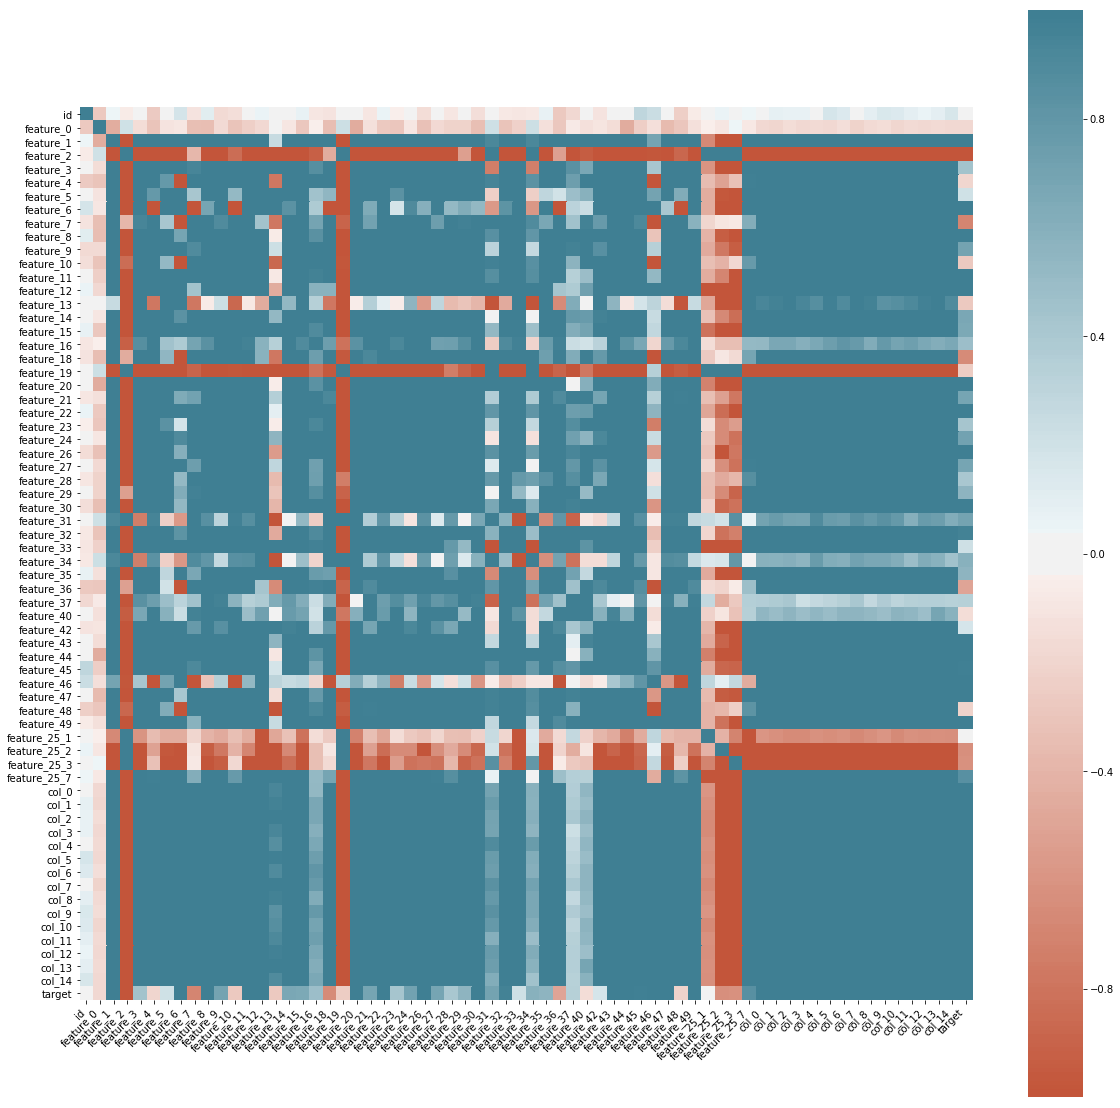

In [677]:
corr = (pd.merge(df_minus, train, how="inner" , on="id")).corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr*10, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [542]:
from sklearn.model_selection import train_test_split

In [678]:
X_train, X_test, y_train, y_test = train_test_split(df_minus[df.id.isin(train.id)].iloc[:, 1:], train.target, test_size=0.2, random_state=42)

In [578]:
y_train.value_counts()

0    2416
1     851
Name: target, dtype: int64

Далі - пошук кращої моделі

In [565]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

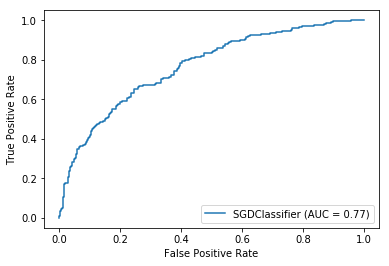

0.7654405564924113

In [695]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier(class_weight="balanced",loss="log", random_state=1, alpha=0.03)
SGDclf.fit(X_train, y_train)
plot_roc_curve(SGDclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, SGDclf.predict_proba(X_test)[:, 1])

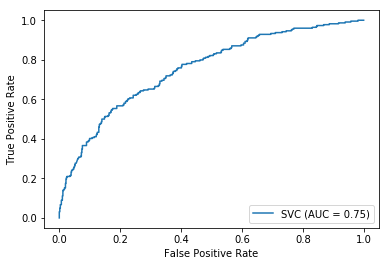

0.7538883702722236

In [680]:
from sklearn.svm import SVC
SVCclf = SVC(probability=True, class_weight="balanced", random_state=42, C=2)
SVCclf.fit(X_train, y_train)
plot_roc_curve(SVCclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, SVCclf.predict_proba(X_test)[:, 1])

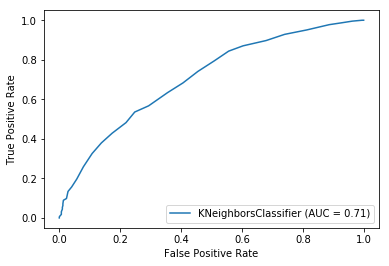

0.7057448506384003

In [681]:
from sklearn.neighbors import KNeighborsClassifier
KNclf = KNeighborsClassifier(n_neighbors=50, leaf_size=50)
KNclf.fit(X_train, y_train)
plot_roc_curve(KNclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, KNclf.predict_proba(X_test)[:, 1])

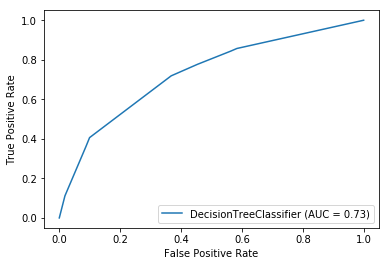

0.7298580161406889

In [682]:
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier(random_state=1, class_weight="balanced",max_depth=3)
DTclf.fit(X_train, y_train)
plot_roc_curve(DTclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, DTclf.predict_proba(X_test)[:, 1])

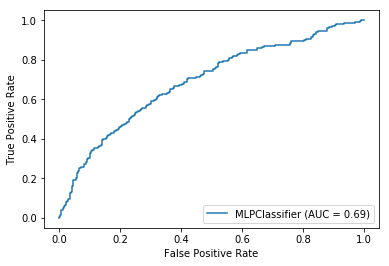

0.6891185858829197

In [683]:
from sklearn.neural_network import MLPClassifier
NNclf = MLPClassifier(random_state=1, max_iter=500, solver="adam", alpha=0.00001, momentum=0.09)
NNclf.fit(X_train, y_train)
plot_roc_curve(NNclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, NNclf.predict_proba(X_test)[:, 1])

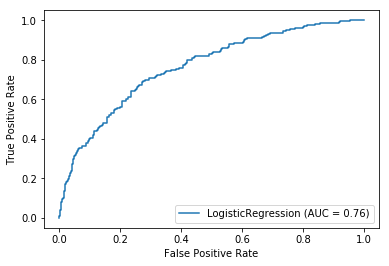

0.7635735364972296

In [670]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegression(random_state=42, max_iter=600, class_weight="balanced", solver="liblinear", C=5).fit(X_train, y_train)
plot_roc_curve(clf, X_test, y_test)
plt.show()    
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [692]:
param_grid = [
  {"class_weight": ["balanced"], "loss": ["log"], "random_state":[1], 
   'alpha': [0.0001, 0.00001, 0.001, 0.01, 0.1 ,0.03], 'epsilon': [0.5, 0.2, 0.001, 0.01, 0.1]},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [693]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(SGDclf, param_grid).fit(X_train, y_train)

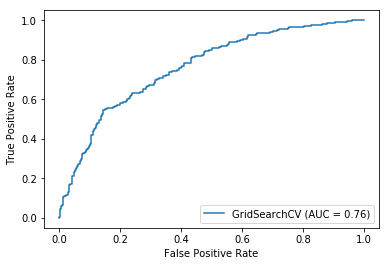

0.762286196097326

In [694]:
plot_roc_curve(grid_clf, X_test, y_test)
plt.show()    
roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:, 1])

Обрана модель з roc_auc_score: 0.765

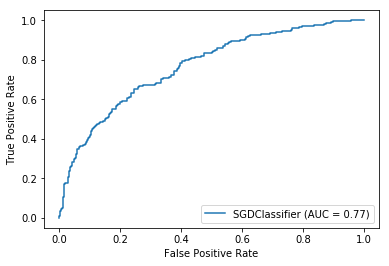

0.7654405564924113

In [698]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier(class_weight="balanced",loss="log", random_state=1, alpha=0.03)
SGDclf.fit(X_train, y_train)
plot_roc_curve(SGDclf, X_test, y_test)
plt.show()  
roc_auc_score(y_test, SGDclf.predict_proba(X_test)[:, 1])

Застосувати модель до тестової вибірки

In [707]:
X = df_minus[df.id.isin(test.id)].iloc[:, 1:]
result_prob = SGDclf.predict_proba(X)[:, 1]

In [709]:
test.score = result_prob
test.head()

,id,score
0,4084,0.267983
1,4085,0.436630
2,4086,0.275670
3,4087,0.320243
4,4088,0.777904


In [711]:
test.to_csv('ZhovtukhinDmyrto_test.csv', index=False)  

In [713]:
import pickle

In [714]:
filename = "model_Zhovtukhin.pkl"
with open(filename, 'wb') as file:
    pickle.dump(SGDclf, file)